In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

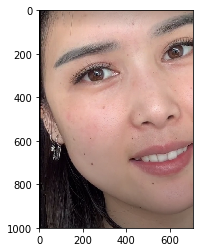

In [12]:
image = cv2.imread('image_homework.jpeg')
plt.imshow(image)
image_RGB = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_RGB)


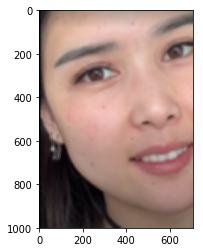

In [13]:
image_result = cv2.GaussianBlur(image_RGB,(15,15),1000,1000)
plt.imshow(image_result)

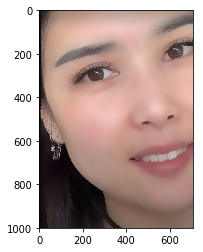

In [14]:
image_result_bf = cv2.bilateralFilter(image_RGB,45,75,75)
plt.imshow(image_result_bf)

[[0.00189036 0.00189036 0.00189036 0.00189036 0.00189036 0.00189036
  0.00189036 0.00189036 0.00189036 0.00189036 0.00189036 0.00189036
  0.00189036 0.00189036 0.00189036 0.00189036 0.00189036 0.00189036
  0.00189036 0.00189036 0.00189036 0.00189036 0.00189036]
 [0.00189036 0.00189036 0.00189036 0.00189036 0.00189036 0.00189036
  0.00189036 0.00189036 0.00189036 0.00189036 0.00189036 0.00189036
  0.00189036 0.00189036 0.00189036 0.00189036 0.00189036 0.00189036
  0.00189036 0.00189036 0.00189036 0.00189036 0.00189036]
 [0.00189036 0.00189036 0.00189036 0.00189036 0.00189036 0.00189036
  0.00189036 0.00189036 0.00189036 0.00189036 0.00189036 0.00189036
  0.00189036 0.00189036 0.00189036 0.00189036 0.00189036 0.00189036
  0.00189036 0.00189036 0.00189036 0.00189036 0.00189036]
 [0.00189036 0.00189036 0.00189036 0.00189036 0.00189036 0.00189036
  0.00189036 0.00189036 0.00189036 0.00189036 0.00189036 0.00189036
  0.00189036 0.00189036 0.00189036 0.00189036 0.00189036 0.00189036
  0.001890

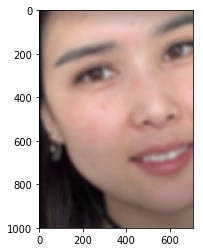

In [16]:
#均值滤波
kernel = np.ones((23,23),np.float32)/529
print(kernel)
image_result = cv2.filter2D(image_RGB,-1,kernel)
plt.imshow(image_result)

[[0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.4    0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]]


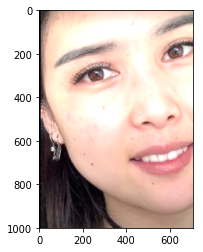

In [36]:
#中值滤波
kernel = np.ones((9,9),np.float32)/80
kernel[3,3]=0.4
print(kernel)
image_result = cv2.filter2D(image_RGB,-1,kernel)
plt.imshow(image_result)

[[4.48939498e-54 1.63034635e-49 2.17809819e-45 1.07048491e-41
  1.93548213e-38 1.28736974e-35 3.15008990e-33 2.83562056e-31
  9.39028564e-30 1.14397098e-28 5.12692224e-28 8.45286576e-28
  5.12692224e-28 1.14397098e-28 9.39028564e-30 2.83562056e-31
  3.15008990e-33 1.28736974e-35 1.93548213e-38 1.07048491e-41
  2.17809819e-45 1.63034635e-49 4.48939498e-54]
 [1.63034635e-49 5.92068474e-45 7.90987308e-41 3.88751977e-37
  7.02880064e-34 4.67514793e-31 1.14397098e-28 1.02976986e-26
  3.41012943e-25 4.15438812e-24 1.86186758e-23 3.06970069e-23
  1.86186758e-23 4.15438812e-24 3.41012943e-25 1.02976986e-26
  1.14397098e-28 4.67514793e-31 7.02880064e-34 3.88751977e-37
  7.90987308e-41 5.92068474e-45 1.63034635e-49]
 [2.17809819e-45 7.90987308e-41 1.05673744e-36 5.19362022e-33
  9.39028564e-30 6.24586993e-27 1.52831398e-24 1.37574440e-22
  4.55583977e-21 5.55014905e-20 2.48740423e-19 4.10103627e-19
  2.48740423e-19 5.55014905e-20 4.55583977e-21 1.37574440e-22
  1.52831398e-24 6.24586993e-27 9.39

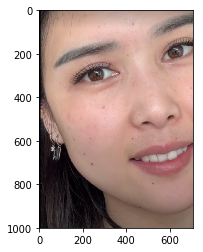

In [38]:
#高斯滤波
kernel_size = 23
sigma = 1
def gassian_kernel(kernel_size, sigma):
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float)
    centre = kernel_size // 2
    for i in range(kernel_size):
        for j in range(kernel_size):
            d = (i - centre)**2 + (j - centre)**2
            kernel[i, j] = np.exp(-d/(2*sigma**2))
    kernel /= (2 * np.pi * sigma**2)
    kernel /= kernel.sum() # 归一化
    return kernel

kernel = gassian_kernel(kernel_size, sigma)
print(kernel)
image_result = cv2.filter2D(image_RGB,-1,kernel)
plt.imshow(image_result)

(300, 300, 3)


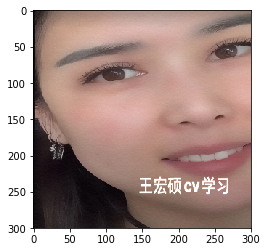

In [47]:
wm = cv2.imread("water.png")
wm = cv2.resize(wm,(300,300))
wm = 255-wm
img1 = cv2.resize(image_result_bf,(300,300))
#img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
print(wm.shape)
plt.imshow(cv2.add(wm,img1))
0.9
plt.imshow(cv2.addWeighted(wm,0.9,img1,0.9,0))
